In [1]:
import os

[  1   2   3   5   9  10  15  71  81  91  92  93 101 102 103 104 105 106
 107 108 109 110 111 112 113 128]


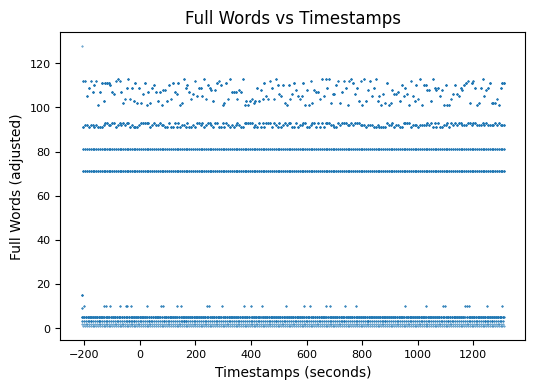

In [5]:
# for 20241220
import numpy as np
import matplotlib.pyplot as plt

# Load the full_words.npy and timestamps.npy files
full_words = np.load(r"D:\20250313\2025-03-13_15-09-41\Record Node 101\experiment1\recording1\events\NI-DAQmx-104.PXIe-6341\TTL\full_words.npy")
timestamps = np.load(r"D:\20250313\2025-03-13_15-09-41\Record Node 101\experiment1\recording1\events\NI-DAQmx-104.PXIe-6341\TTL\timestamps.npy")

full_words[full_words >= 256] -= 256
# Exclude values that are still >= 256 after subtraction
valid_indices = (full_words > 0) & (full_words <= 256) & (full_words != 13)
timestamps = timestamps 
filtered_full_words = full_words[valid_indices]
filtered_timestamps = timestamps[valid_indices]
filtered_full_words = filtered_full_words
# Plot filtered full_words as a function of timestamps with smaller figure size and marker size
plt.figure(figsize=(6, 4))  # Smaller figure size
plt.plot(filtered_timestamps, filtered_full_words, '.', markersize=0.8)  # Smaller marker size
plt.xlabel("Timestamps (seconds)")
plt.ylabel("Full Words (adjusted)")
plt.title("Full Words vs Timestamps")

# Reduce ticks for a cleaner look
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#plt.show()
print(np.unique(filtered_full_words))


In [134]:
import numpy as np
import scipy.io
import os

filtered_full_words = np.array(filtered_full_words)
filtered_timestamps = np.array(filtered_timestamps) 
shifted = np.roll(filtered_full_words, 1)
shifted_l = np.roll(filtered_full_words, -1)
shifted[0] = 0   
shifted_l[filtered_full_words.size - 1] = 0

FIX = (filtered_full_words == 2) & (shifted != 2)
FIXATION = (filtered_full_words == 3)
STIMONOFF = (filtered_full_words == 5)
SACC = (filtered_full_words == 6)
TARGHOLD = (filtered_full_words == 7)
POSTTARGHOLD = (filtered_full_words == 8)
BREAKFIX = (filtered_full_words == 10)

events = []

fpOn = filtered_timestamps[FIX]
fixation = filtered_timestamps[FIXATION]
stimOn = filtered_timestamps[STIMON]
stimOff = filtered_timestamps[STIMOFF]
saccOnset = filtered_timestamps[SACC]
targHold = filtered_timestamps[TARGHOLD]
postTargHold = filtered_timestamps[POSTTARGHOLD]
breakFix = filtered_timestamps[BREAKFIX]

diff_fpOn = np.diff(fpOn)
inx = np.where(diff_fpOn > 30)[0]

trial_size = len(fpOn) - inx[0] -1

fpOn_time = np.full(trial_size, np.nan) 
fixation_time = np.full(trial_size, np.nan)
stimOn_time = np.full(trial_size, np.nan)
stimOff_time = np.full(trial_size, np.nan)
saccOnset_time = np.full(trial_size, np.nan)
targHold_time = np.full(trial_size, np.nan)
postTargHold_time = np.full(trial_size, np.nan)
breakFix_time = np.full(trial_size, np.nan)
good_trial = np.zeros(trial_size)


#for i in range(inx[0]):
for i in range(trial_size):
    start_time = fpOn[i + inx[0]]
    if i != trial_size - 1:
        end_time = fpOn[i + 1 + inx[0]]
        
    else:
        end_time = start_time +10

    
   
    fixation_in_trial = fixation[(fixation >= start_time) & (fixation <= end_time)]
    stimOn_in_trial = stimOn[(stimOn >= start_time) & (stimOn <= end_time)]
    stimOff_in_trial = stimOff[(stimOff >= start_time) & (stimOff <= end_time)]
    saccOnset_in_trial = saccOnset[(saccOnset >= start_time) & (saccOnset <= end_time)]
    targHold_in_trial = targHold[(targHold >= start_time) & (targHold <= end_time)]
    postTargHold_in_trial = postTargHold[(postTargHold >= start_time) & (postTargHold <= end_time)]
    breakFix_in_trial = breakFix[(breakFix >= start_time) & (breakFix <= end_time)]

    fpOn_time[i] = start_time  
    fixation_time[i] = fixation_in_trial[0] if len(fixation_in_trial) > 0 else np.nan
    stimOn_time[i] = stimOn_in_trial[0] if len(stimOn_in_trial) > 0 else np.nan
    stimOff_time[i] = stimOff_in_trial[-1] if len(stimOff_in_trial) > 0 else np.nan
    saccOnset_time[i] = saccOnset_in_trial[0] if len(saccOnset_in_trial) > 0 else np.nan
    targHold_time[i] = targHold_in_trial[0] if len(targHold_in_trial) > 0 else np.nan
    postTargHold_time[i] = postTargHold_in_trial[0] if len(postTargHold_in_trial) > 0 else np.nan
    breakFix_time[i] = breakFix_in_trial[0] if len(breakFix_in_trial) > 0 else np.nan
    good_trial[i] = 0 if len(breakFix_in_trial) > 0 else 1

    if i >0 :
        print(fpOn_time[i])
        print(fixation_time[i], stimOn_time[i], stimOff_time[i], saccOnset_time[i], targHold_time[i], postTargHold_time[i], breakFix_time[i], good_trial[i])


events = {
    'fpOn': fpOn_time,
    'fixation': fixation_time,
    'stimOn': stimOn_time,
    'stimOff': stimOff_time,
    'saccOnset': saccOnset_time,
    'targHold': targHold_time,
    'postTargHold': postTargHold_time,
    'breakFix': breakFix_time,
    'goodtrial': good_trial
}

save_path = 'D:\zarya_20241220.mat'
trial = {'events': events}

scipy.io.savemat(save_path, {'dots3DMPtunning': trial})

print(f"Data saved at '{save_path}'.")


2853.235932770864
2853.6342591381053 2853.876401306795 2854.176923387889 nan nan nan 2854.8766859704874 0.0
2859.4220653891
nan nan nan nan nan nan 2863.4201480970346 0.0
2865.3971351456807
2865.4038344700784 2868.2634528931235 2868.563689321134 nan nan nan 2868.863425799498 0.0
2873.4085292468
2873.414761953616 2873.806589233478 2876.0820144174318 nan nan nan nan 1.0
2880.0588565951816
2880.1161841770954 2880.4832806812806 2880.7837380887595 nan nan nan 2881.19189716656 0.0
2885.7359839880614
2886.1844390841593 2886.301427370098 2886.601818555005 nan nan nan 2887.4351684990897 0.0
2891.9375945177353
2893.37778392589 2893.6284472631446 2895.9035867121083 nan nan nan nan 1.0
2899.91393045954
2899.987756429502 2900.2720502272855 2902.5472457496094 nan nan nan nan 1.0
2906.5491589117955
2906.948119223556 2907.231824334142 2909.5073540540598 nan nan nan nan 1.0
2913.484804666203
2913.816628089765 2913.992210668681 2916.2677080911835 nan nan nan nan 1.0
2920.236094850243
2920.626689505551 2

In [91]:
fpOn[inx[0]]

2798.3612500327113